Dataset shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168   

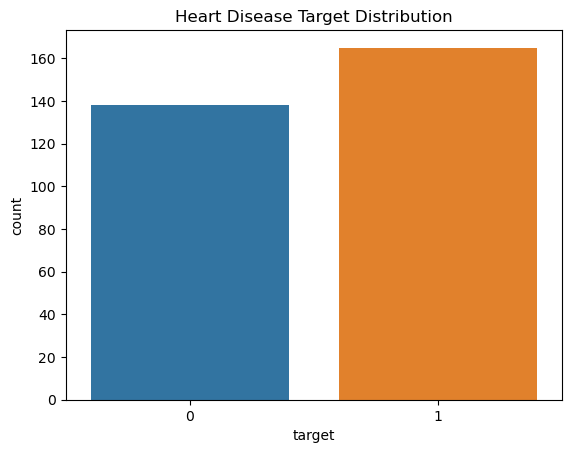

Train shape: (242, 13) Test shape: (61, 13)
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

Heart Disease Random Forest model saved successfully!
Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.7704918032786885
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77    

In [2]:
# %% [markdown]
# # Heart Disease Model: Comparison of 3 Models
#
# This notebook loads the heart disease dataset, performs EDA and preprocessing, trains three models (Random Forest, Logistic Regression, and SVM) with hyperparameter tuning, evaluates them, and saves each model.

# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.makedirs("Models", exist_ok=True)

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# %%
# Load the heart disease dataset
df = pd.read_csv(r"C:\Users\pc\Desktop\med\Datasets\heart_disease_data.csv")
print("Dataset shape:", df.shape)
df.head()

# %%
# Basic EDA
df.info()
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Assuming the target column is 'target'
sns.countplot(x='target', data=df)
plt.title("Heart Disease Target Distribution")
plt.show()

# %%
# Data Preprocessing
# (If needed, encode categorical variables; here we assume the data is numeric.)
X = df.drop("target", axis=1)
y = df["target"]

# %%
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# %% [markdown]
# ### Model 1: Random Forest Classifier

# %%
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, n_iter=10, cv=5,
    scoring='accuracy', random_state=42, n_jobs=-1
)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
print("Best Random Forest Params:", rf_random.best_params_)

y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

joblib.dump(best_rf, "Models/heart_disease_rf_model.pkl")
print("Heart Disease Random Forest model saved successfully!")

# %% [markdown]
# ### Model 2: Logistic Regression

# %%
lr = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Params:", lr_grid.best_params_)

y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

joblib.dump(best_lr, "Models/heart_disease_lr_model.pkl")
print("Heart Disease Logistic Regression model saved successfully!")

# %% [markdown]
# ### Model 3: Support Vector Machine

# %%
svc = SVC(probability=True)
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_
print("Best SVM Params:", svc_grid.best_params_)

y_pred_svc = best_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", accuracy_svc)
print(classification_report(y_test, y_pred_svc))

joblib.dump(best_svc, "Models/heart_disease_svc_model.pkl")
print("Heart Disease SVM model saved successfully!")

# %%
print("Comparison of Models for Heart Disease:")
print(f"Random Forest: {accuracy_rf:.4f}")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"SVM: {accuracy_svc:.4f}")
